In [2]:
import os
import re
import nltk
import spacy
import string

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pylab
from matplotlib import pyplot as plt

from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer



import warnings
warnings.filterwarnings('ignore')

In [3]:
# importing required modules
from zipfile import ZipFile

# specifying the zip file name
file_name = "Resumes.zip"

# opening the zip file in READ mode
with ZipFile(file_name, 'r') as zip:
	# printing all the contents of the zip file
	zip.printdir()

	# extracting all the files
	print('Extracting all the files now...')
	zip.extractall()
	print('Done!')

File Name                                             Modified             Size
Resumes-20220812T140008Z-001 (1) (2) (1)/Resumes/ 2023-07-12 11:40:34            0
Resumes-20220812T140008Z-001 (1) (2) (1)/Resumes/Peoplesoft resumes/ 2023-07-11 23:55:36            0
Resumes-20220812T140008Z-001 (1) (2) (1)/Resumes/Peoplesoft resumes/Peoplesoft Admin_AnubhavSingh.docx 2023-07-11 23:55:36       237522
Resumes-20220812T140008Z-001 (1) (2) (1)/Resumes/Peoplesoft resumes/Peoplesoft Admin_G Ananda Rayudu.doc 2023-07-11 23:55:34        64512
Resumes-20220812T140008Z-001 (1) (2) (1)/Resumes/Peoplesoft resumes/Peoplesoft Admin_Gangareddy.doc 2023-07-11 23:55:34        49152
Resumes-20220812T140008Z-001 (1) (2) (1)/Resumes/Peoplesoft resumes/Peoplesoft Admin_Murali.docx 2023-07-11 23:55:36        33190
Resumes-20220812T140008Z-001 (1) (2) (1)/Resumes/Peoplesoft resumes/Peoplesoft Admin_Priyanka Ramadoss.doc 2023-07-11 23:55:36        43008
Resumes-20220812T140008Z-001 (1) (2) (1)/Resumes/Peoplesof

In [4]:
!pip install python-docx
!pip install docx
!pip install pyresparser


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 38.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for python-docx: filename=python_docx-0.8.11-py3-none-any.whl size=184491 sha256=06c14b5f3567f52c4c6a5aa373e171a4f9b115801f7e48c768ea8d4b86f1e1de
  Stored in directory: /root/.cache/pip/wheels/80/27/06/837436d4c3bd989b957a91679966f207bfd71d358d63a8194d
Successfully built python-docx
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.9/54.9 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docx: filename=docx-0.2.4-py3-none-any.whl size=53897 sha256=02c7b5eb817f45c64901b75fbf77c920008b41b1e4efd5681d4c73fb485306c5
  Stored in directory: /root/.cache/pip/wheels/81/f5/1d/e09ba2c1907a43a4146d1189ae4733ca1a3bfe27ee39507767
Successfully built docx
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 34.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 63.8 

In [5]:
!sudo apt-get install antiword

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  antiword
0 upgraded, 1 newly installed, 0 to remove and 15 not upgraded.
Need to get 118 kB of archives.
After this operation, 603 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 antiword amd64 0.37-16 [118 kB]
Fetched 118 kB in 1s (209 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package antiword.
(Reading database ... 123105 files and directories currently

In [7]:
pip install textract

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.9/106.9 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.0/69.0 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 64.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 97.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 32.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.3/103.3 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.0/74.0 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 10.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.5/128.5 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.0/153.0 kB 14.0 MB/s et

In [8]:
import  textract

In [10]:
os.listdir('/content/Resumes-20220812T140008Z-001 (1) (2) (1)/Resumes')

['Peoplesoft resumes',
 'React Developer',
 'workday resumes',
 'SQL Developer Lightning insight']

In [11]:
file_path = []
category  = []
directory = '/content/Resumes-20220812T140008Z-001 (1) (2) (1)/Resumes/Peoplesoft resumes'
for i in os.listdir(directory):
    if i.endswith('.docx') or i.endswith('.doc') or i.endswith('.pdf'):
        os.path.join(directory, i)
        file_path.append((textract.process(os.path.join(directory, i))).decode('utf-8'))
        category.append('PeopleSoft resume')

In [12]:
data = pd.DataFrame(data = file_path , columns = ['Resume'])
data['category'] = category
data

,Resume,category
0,\n\n\n\n\n\n\n\n\nProfile Summary:\n • 7+ year...,PeopleSoft resume
1,Classification: Internal\n\nClassification: In...,PeopleSoft resume
2,"\nPriyanka Ramadoss\n\n61/46, MountPleasant,\n...",PeopleSoft resume
3,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,PeopleSoft resume
4,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...,PeopleSoft resume
5,\n|Personal Details ...,PeopleSoft resume
6,\n PeopleSoft Database Ad...,PeopleSoft resume
7,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,PeopleSoft resume
8,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,PeopleSoft resume
9,\nVinod Akkala\nPeopleSoft DBA Admin.\n\n\nPro...,PeopleSoft resume


In [13]:
file_path_1 = []
category_1  = []
directory_1 = '/content/Resumes-20220812T140008Z-001 (1) (2) (1)/Resumes/SQL Developer Lightning insight'
for i in os.listdir(directory_1):
    if i.endswith('.docx') or i.endswith('.doc') or i.endswith('.pdf'):
        os.path.join(directory_1, i)
        file_path_1.append((textract.process(os.path.join(directory_1, i))).decode('utf-8'))
        category_1.append('SQL Developer')

In [14]:
data_1 = pd.DataFrame(data= file_path_1 , columns = ['Resume'])
data_1['category'] = category_1
data_1

,Resume,category
0,SQL DEVELOPER\n\nName: - Bandi prem sai\n\n\...,SQL Developer
1,KAMBALLA PRADEEP ...,SQL Developer
2,\n\nCareer objective\n\n\nA rewarding opportun...,SQL Developer
3,Name: Ramesh\n\n\t\n\n\tCareer Objective: \n\n...,SQL Developer
4,SQL AND MSBI DEVELOPER\n\nSQL AND MSBI DEVELOP...,SQL Developer
5,RAJU PAVANA KUMARI\n\n\n\n\t\n\n\tProfessional...,SQL Developer
6,\n\n\n\n\n “ Hyderabad\nNazeer Basha\n SQL and...,SQL Developer
7,Aradhana Tripathi\n\n\n\nCurrent Location: Gac...,SQL Developer
8,BUDDHA VAMSI ...,SQL Developer
9,Resume\n\nName : Neeraj Mishra\n\n\n\nExp...,SQL Developer


In [15]:
file_path_2 = []
category_2  = []
directory_2 = '/content/Resumes-20220812T140008Z-001 (1) (2) (1)/Resumes/workday resumes'
for i in os.listdir(directory_2):
    if i.endswith('.docx') or i.endswith('.doc') or i.endswith('.pdf'):
        os.path.join(directory_2, i)
        file_path_2.append((textract.process(os.path.join(directory_2, i))).decode('utf-8'))
        category_2.append('workday resume')

In [16]:
data_2 = pd.DataFrame(data= file_path_2 , columns = ['Resume'])
data_2['category'] = category_2
data_2

,Resume,category
0,Name : Gopi Krishna Reddy\n\n\t\t\t\t ...,workday resume
1,\n Workday Integration Consultant\n\nName...,workday resume
2,Vinay kumar .v\nWorkday Functional Consultant\...,workday resume
3,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...,workday resume
4,JYOTI VERMA\t\t\t\t\t\n\n\n\nPROFESSIONAL SUMM...,workday resume
5,\nHarikrishna Akula\n\n\n\n Summary:\n ❖ 5....,workday resume
6,\nShireesh ...,workday resume
7,\nVenkateswarlu.B ...,workday resume
8,Mooraboyina Guravaiah\n\nWorkday Integration S...,workday resume
9,G Himaja\n\n ...,workday resume


In [17]:
file_path_3 = []
category_3  = []
directory_3 = '/content/Resumes-20220812T140008Z-001 (1) (2) (1)/Resumes/React Developer'
for i in os.listdir(directory_3):
    if i.endswith('.docx') or i.endswith('.doc') or i.endswith('.pdf'):
        os.path.join(directory_3, i)
        file_path_3.append((textract.process(os.path.join(directory_3, i))).decode('utf-8'))
        category_3.append('React Developer')

In [18]:
data_3 = pd.DataFrame(data= file_path_3 , columns = ['Resume'])
data_3['category'] = category_3
data_3

,Resume,category
0,\n [pic]\n\nPROFILE\n\n Searching for the oppo...,React Developer
1,PRAGNYA PATTNAIK\n\n \n\n \n\n \n\n Expertise:...,React Developer
2,MAREEDU LOKESH BABU\n\nPROFESSIONAL OVERVIEW\n...,React Developer
3,Name: Ravali P \n\n\n\n ...,React Developer
4,\nMaryala Vinay Reddy\n\nProfessional Summary:...,React Developer
5,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React Developer
6,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...,React Developer
7,Pranish Sonone\n\n\t\t\n\n\n\n\n\n\n\n\n\nCare...,React Developer
8,SHAIK ABDUL SHARUK \n\n2 years’ Experience i...,React Developer
9,KAMBALA SAI SURENDRA \n\n \n\n \n\n \n\n\n\n...,React Developer


In [19]:
final=pd.concat([data,data_1,data_2,data_3],axis=0)
final= final.reset_index()
final=final.drop(columns='index',axis=0)
final

,Resume,category
0,\n\n\n\n\n\n\n\n\nProfile Summary:\n • 7+ year...,PeopleSoft resume
1,Classification: Internal\n\nClassification: In...,PeopleSoft resume
2,"\nPriyanka Ramadoss\n\n61/46, MountPleasant,\n...",PeopleSoft resume
3,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,PeopleSoft resume
4,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...,PeopleSoft resume
...,...,...
74,\n CURRICULUM VIT...,React Developer
75,Ranga Gaganam \n\n\n\n \n\nProfessional\n\n \...,React Developer
76,"SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...",React Developer
77,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...,React Developer


In [20]:
final.to_csv('new_Resume.csv', index=False)

In [21]:
resume_data = pd.read_csv("new_Resume.csv")
resume_data

,Resume,category
0,\n\n\n\n\n\n\n\n\nProfile Summary:\n • 7+ year...,PeopleSoft resume
1,Classification: Internal\n\nClassification: In...,PeopleSoft resume
2,"\nPriyanka Ramadoss\n\n61/46, MountPleasant,\n...",PeopleSoft resume
3,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,PeopleSoft resume
4,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...,PeopleSoft resume
...,...,...
74,\n CURRICULUM VIT...,React Developer
75,Ranga Gaganam \n\n\n\n \n\nProfessional\n\n \...,React Developer
76,"SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...",React Developer
77,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...,React Developer


In [22]:
resume_data.shape

(79, 2)

In [23]:
resume_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Resume    79 non-null     object
 1   category  79 non-null     object
dtypes: object(2)
memory usage: 1.4+ KB


In [24]:
resume_data['category'].value_counts()

React Developer      24
workday resume       21
PeopleSoft resume    20
SQL Developer        14
Name: category, dtype: int64

In [25]:
resume_data.isnull().sum()

Resume      0
category    0
dtype: int64

In [26]:
#number of words in each resume
resume_data['Word_Count'] = resume_data['Resume'].apply(lambda x: len(str(x).split(" ")))
resume_data[['Resume','Word_Count']].head()

,Resume,Word_Count
0,\n\n\n\n\n\n\n\n\nProfile Summary:\n • 7+ year...,2189
1,Classification: Internal\n\nClassification: In...,558
2,"\nPriyanka Ramadoss\n\n61/46, MountPleasant,\n...",3164
3,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,433
4,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...,540


In [27]:
#no of charectors
resume_data['Char_Count'] = resume_data['Resume'].str.len()
resume_data[['Resume','Char_Count']].head()

,Resume,Char_Count
0,\n\n\n\n\n\n\n\n\nProfile Summary:\n • 7+ year...,8847
1,Classification: Internal\n\nClassification: In...,4917
2,"\nPriyanka Ramadoss\n\n61/46, MountPleasant,\n...",7729
3,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,3669
4,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...,3577


In [28]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [29]:
#no of stop words

stop = stopwords.words('english')
resume_data['Stopwords'] = resume_data['Resume'].apply(lambda x: len([x for x in x.split() if x in stop]))
resume_data[['Resume','Stopwords']].head()

,Resume,Stopwords
0,\n\n\n\n\n\n\n\n\nProfile Summary:\n • 7+ year...,186
1,Classification: Internal\n\nClassification: In...,114
2,"\nPriyanka Ramadoss\n\n61/46, MountPleasant,\n...",122
3,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,84
4,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...,136


In [30]:
#no of numeric
resume_data['Numerics'] = resume_data['Resume'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
resume_data[['Resume','Numerics']].head()

,Resume,Numerics
0,\n\n\n\n\n\n\n\n\nProfile Summary:\n • 7+ year...,6
1,Classification: Internal\n\nClassification: In...,7
2,"\nPriyanka Ramadoss\n\n61/46, MountPleasant,\n...",4
3,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,13
4,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...,3


In [31]:
resume_data

,Resume,category,Word_Count,Char_Count,Stopwords,Numerics
0,\n\n\n\n\n\n\n\n\nProfile Summary:\n • 7+ year...,PeopleSoft resume,2189,8847,186,6
1,Classification: Internal\n\nClassification: In...,PeopleSoft resume,558,4917,114,7
2,"\nPriyanka Ramadoss\n\n61/46, MountPleasant,\n...",PeopleSoft resume,3164,7729,122,4
3,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,PeopleSoft resume,433,3669,84,13
4,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...,PeopleSoft resume,540,3577,136,3
...,...,...,...,...,...,...
74,\n CURRICULUM VIT...,React Developer,26002,35202,299,26
75,Ranga Gaganam \n\n\n\n \n\nProfessional\n\n \...,React Developer,435,3299,86,4
76,"SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...",React Developer,349,3156,93,5
77,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...,React Developer,777,3273,70,5


In [32]:
def preprocess(sentence):
    sentence = str(sentence)
    sentence = sentence.lower()
    sentence = sentence.replace('{html}',"")
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url = re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]

    return " ".join(filtered_words)

In [33]:
resume_data = pd.read_csv('new_Resume.csv')
resume_data['Resume_Details'] = resume_data.Resume.apply(lambda x: preprocess(x))

In [34]:
resume_data

,Resume,category,Resume_Details
0,\n\n\n\n\n\n\n\n\nProfile Summary:\n • 7+ year...,PeopleSoft resume,profile summary years experience implementing ...
1,Classification: Internal\n\nClassification: In...,PeopleSoft resume,classification internal classification interna...
2,"\nPriyanka Ramadoss\n\n61/46, MountPleasant,\n...",PeopleSoft resume,priyanka ramadoss mountpleasant coonoor nilgir...
3,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,PeopleSoft resume,murali professional summary years experience p...
4,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...,PeopleSoft resume,priyabrata hota career objective pursuing peop...
...,...,...,...
74,\n CURRICULUM VIT...,React Developer,curriculum vitae anjani priyadarshini objectiv...
75,Ranga Gaganam \n\n\n\n \n\nProfessional\n\n \...,React Developer,ranga gaganam professional summary professiona...
76,"SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...",React Developer,sarala madasu sarala madasu sri geethika prest...
77,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...,React Developer,khizaruddin rauf experience currently working ...


In [35]:
resume_data.drop(['Resume'], axis = 1, inplace = True)
resume_data

,category,Resume_Details
0,PeopleSoft resume,profile summary years experience implementing ...
1,PeopleSoft resume,classification internal classification interna...
2,PeopleSoft resume,priyanka ramadoss mountpleasant coonoor nilgir...
3,PeopleSoft resume,murali professional summary years experience p...
4,PeopleSoft resume,priyabrata hota career objective pursuing peop...
...,...,...
74,React Developer,curriculum vitae anjani priyadarshini objectiv...
75,React Developer,ranga gaganam professional summary professiona...
76,React Developer,sarala madasu sarala madasu sri geethika prest...
77,React Developer,khizaruddin rauf experience currently working ...


In [36]:
resume_data.to_csv('new_Resumes.csv', index = False)

In [37]:
resume_data = pd.read_csv('new_Resumes.csv')
resume_data

,category,Resume_Details
0,PeopleSoft resume,profile summary years experience implementing ...
1,PeopleSoft resume,classification internal classification interna...
2,PeopleSoft resume,priyanka ramadoss mountpleasant coonoor nilgir...
3,PeopleSoft resume,murali professional summary years experience p...
4,PeopleSoft resume,priyabrata hota career objective pursuing peop...
...,...,...
74,React Developer,curriculum vitae anjani priyadarshini objectiv...
75,React Developer,ranga gaganam professional summary professiona...
76,React Developer,sarala madasu sarala madasu sri geethika prest...
77,React Developer,khizaruddin rauf experience currently working ...


In [38]:
resume_data.Resume_Details[0]

'profile summary years experience implementing upgrading supporting peoplesoft database administration including human capital management hcm financials campus solutions portal ihub expertise installation configuration setup security management peoplesoft internet architecture pia environment depth experience analysis planning development implementation stages including load testing quality assurance tuning gained extensive exposure deploying peoplesoft environments experienced troubleshooting peoplesoft components skilled capability analyse interpret unique problems combination training experience logical thinking find right solutions core competencies peoplesoft implementation troubleshooting peoplesoft performance issues project data migration installation configuration peoplesoft components pum dpk install configure upgrades people tools expertise applying patches updates via change assistant tool including tax updates elastic search install configure peoplesoft refreshes cloning i

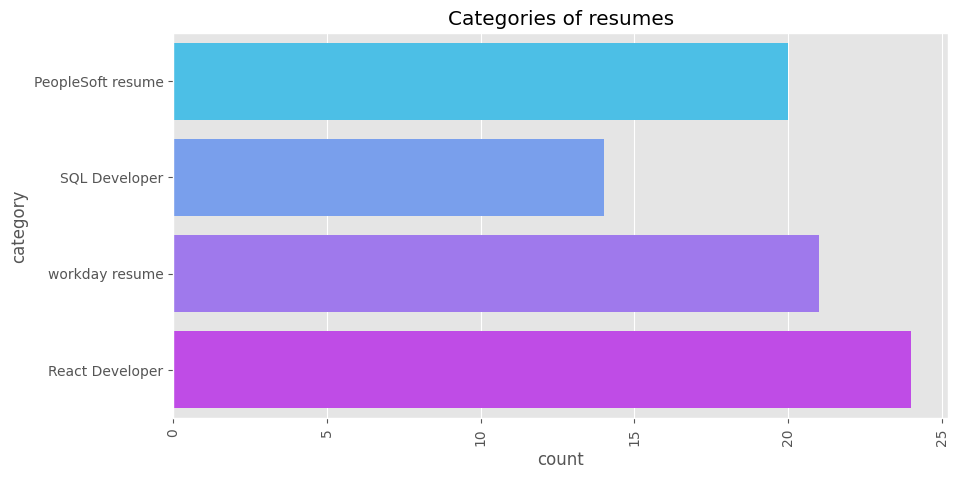

In [39]:
plt.style.use('ggplot')
plt.figure(figsize=(10,5))
plt.title("Categories of resumes")
plt.xticks(rotation=90)
#colors = sns.color_palette('pastel')
sns.countplot(y="category",data=resume_data,palette='cool')
plt.show()

In [40]:
label_counts = resume_data['category'].value_counts()

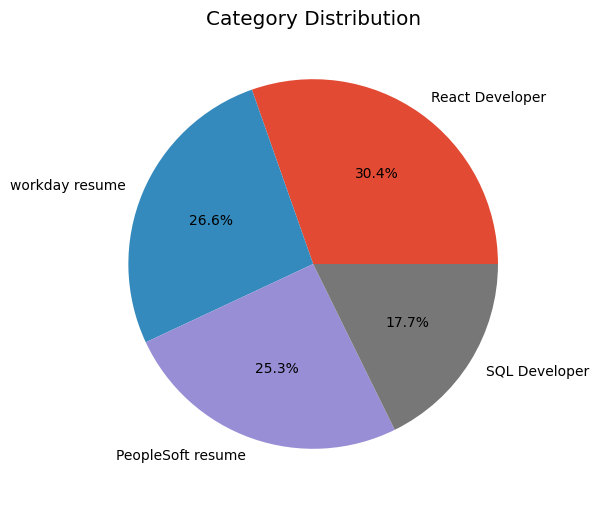

In [41]:
plt.figure(figsize=(6, 6))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%')
plt.title('Category Distribution')
plt.show()

In [42]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [43]:
oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = resume_data['Resume_Details'].values
cleanedSentences = ""
for records in Sentences:
    cleanedText = preprocess(records)
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)

wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(100)
print(mostcommon)

[('experience', 598), ('peoplesoft', 453), ('workday', 431), ('application', 418), ('using', 395), ('server', 359), ('data', 332), ('project', 326), ('reports', 326), ('sql', 280), ('business', 273), ('web', 250), ('database', 243), ('process', 236), ('worked', 220), ('knowledge', 216), ('client', 197), ('system', 192), ('involved', 191), ('tools', 190), ('integrations', 189), ('integration', 183), ('hcm', 182), ('like', 180), ('support', 178), ('skills', 171), ('good', 169), ('development', 168), ('team', 166), ('creating', 164), ('working', 162), ('people', 160), ('technical', 160), ('services', 157), ('report', 155), ('design', 154), ('servers', 152), ('testing', 150), ('created', 150), ('react', 148), ('various', 146), ('oracle', 142), ('role', 142), ('environment', 139), ('developer', 139), ('responsibilities', 137), ('management', 136), ('security', 134), ('eib', 134), ('production', 133), ('issues', 132), ('core', 128), ('studio', 128), ('work', 124), ('custom', 124), ('windows'

In [44]:
categories = np.sort(resume_data['category'].unique())
categories

array(['PeopleSoft resume', 'React Developer', 'SQL Developer',
       'workday resume'], dtype=object)

In [45]:
df_categories = [resume_data[resume_data['category'] == category].loc[:, ['Resume_Details', 'category']] for category in categories]
df_categories

[                                       Resume_Details           category
 0   profile summary years experience implementing ...  PeopleSoft resume
 1   classification internal classification interna...  PeopleSoft resume
 2   priyanka ramadoss mountpleasant coonoor nilgir...  PeopleSoft resume
 3   murali professional summary years experience p...  PeopleSoft resume
 4   priyabrata hota career objective pursuing peop...  PeopleSoft resume
 5   personal details name pritam biswas date birth...  PeopleSoft resume
 6   peoplesoft database administrator gangareddy p...  PeopleSoft resume
 7   address manyata tech park nagavara bangalore l...  PeopleSoft resume
 8   peoplesoft admin varkala vikas career objectiv...  PeopleSoft resume
 9   vinod akkala peoplesoft dba admin professional...  PeopleSoft resume
 10  arun venu experience summary experience years ...  PeopleSoft resume
 11  peoplesoft admin peoplesoft dba ganesh alladi ...  PeopleSoft resume
 12  anubhav kumar singh core competen

In [46]:

def wordcloud(df):
    txt = ' '.join(txt for txt in df['Resume_Details'])
    wordcloud = WordCloud(
        height=2000,
        width=4000,
        colormap=WORDCLOUD_COLOR_MAP
    ).generate(txt)

    return wordcloud

In [47]:
# for other theme, please run: mpl.pyplot.style.available
PLOT_PALETTE = 'tableau-colorblind10'
# for other color map, please run: mpl.pyplot.colormaps()
WORDCLOUD_COLOR_MAP = 'tab10_r'
plt.style.use(PLOT_PALETTE)
%matplotlib inline


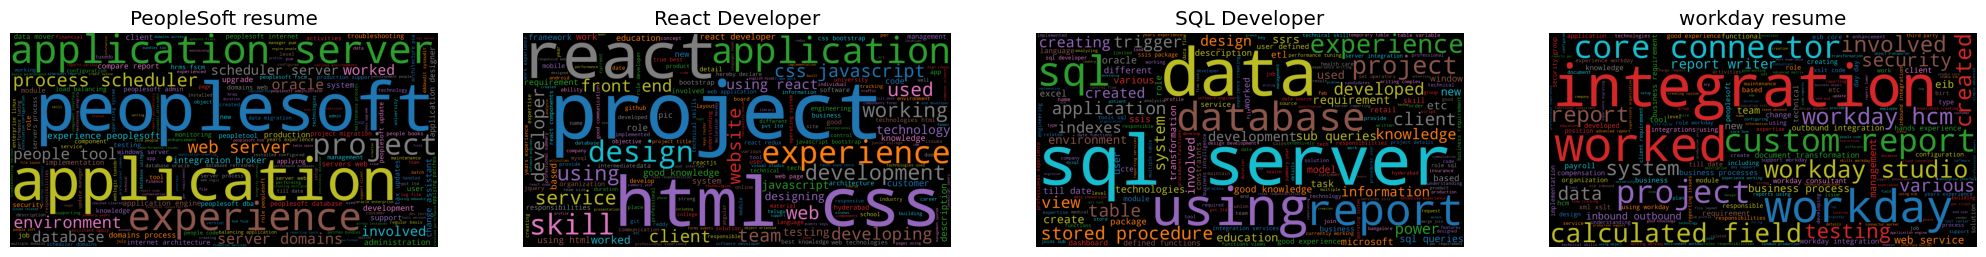

In [48]:
plt.figure(figsize=(32, 28))

for i, category in enumerate(categories):
    wc = wordcloud(df_categories[i])

    plt.subplot(5, 5, i + 1).set_title(category)
    plt.imshow(wc)
    plt.axis('off')
    plt.plot()

plt.show()
plt.close()

In [49]:
def wordfreq(df):
    count = df['Resume_Details'].str.split(expand=True).stack().value_counts().reset_index()
    count.columns = ['Word', 'Frequency']

    return count.head(10)

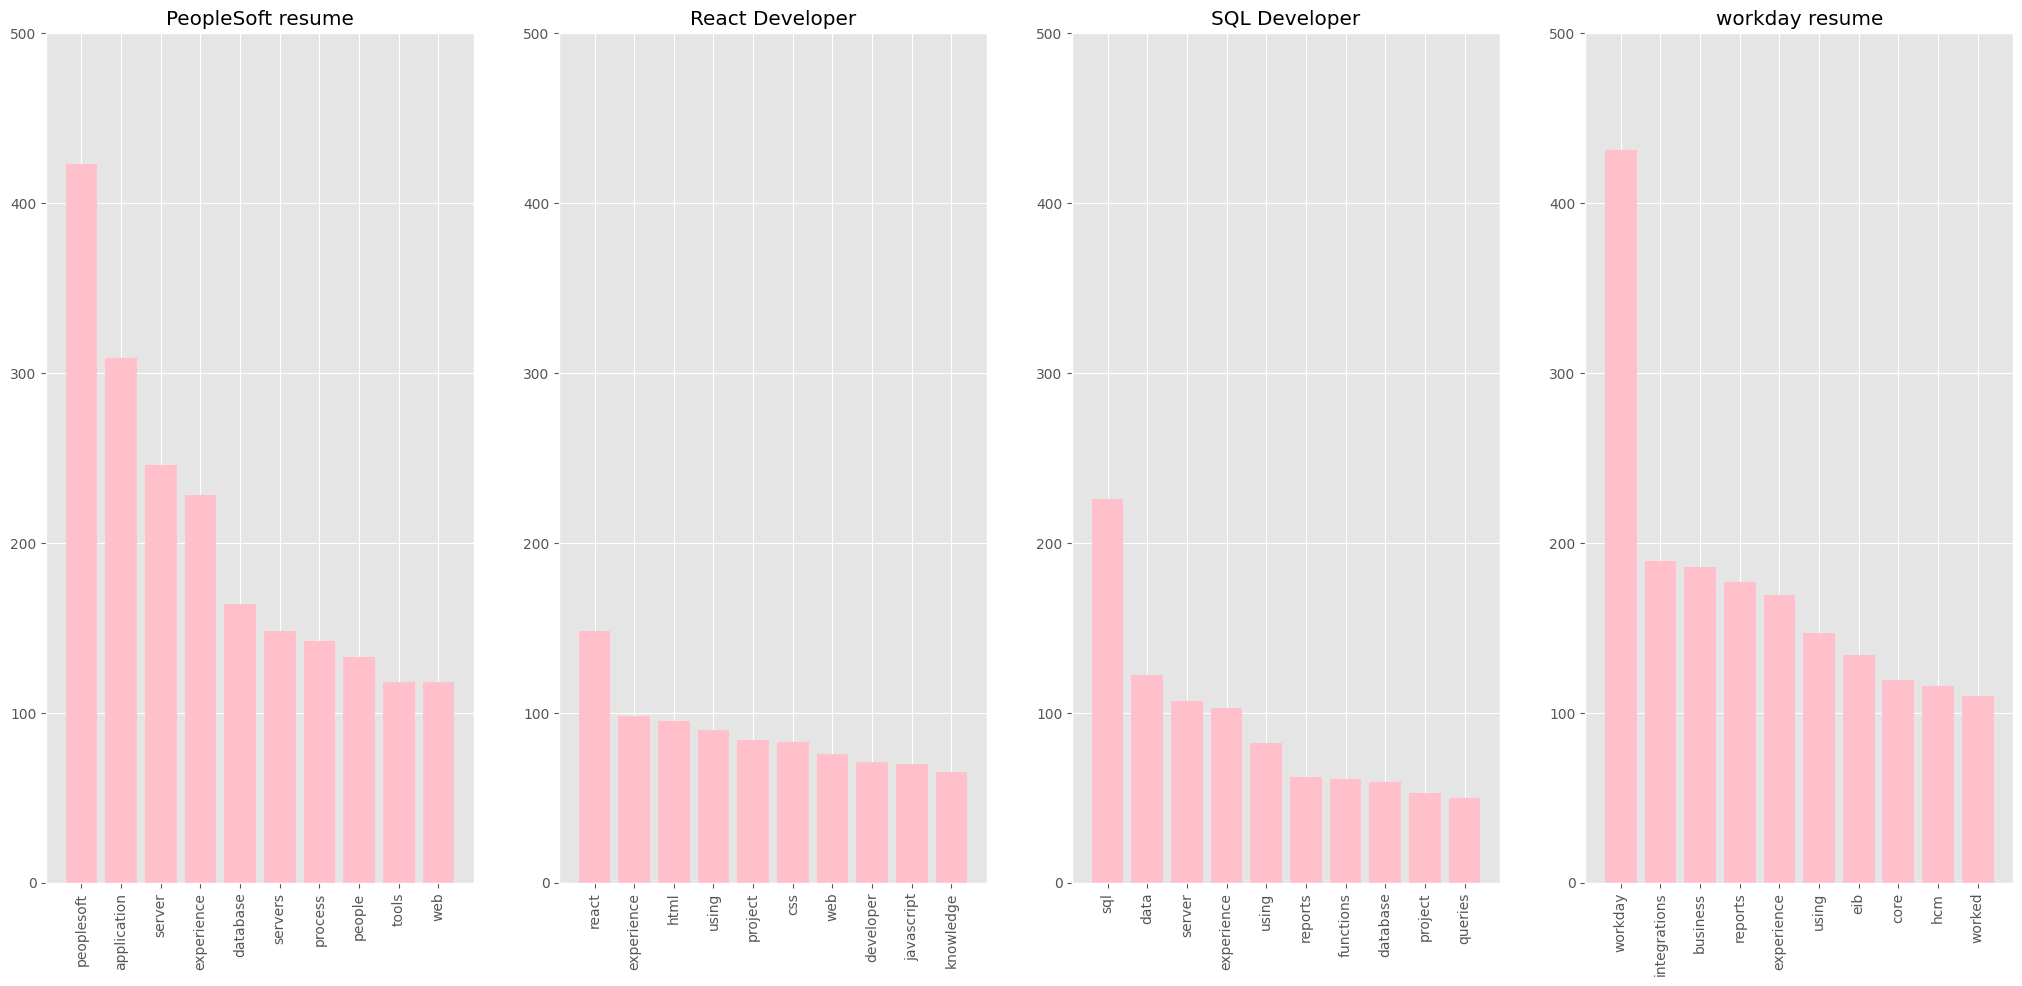

In [50]:

fig = plt.figure(figsize=(32, 64))

for i, category in enumerate(categories):
    wf = wordfreq(df_categories[i])

    fig.add_subplot(5, 5, i + 1).set_title(category)
    plt.bar(wf['Word'], wf['Frequency'],color='pink')
    plt.xticks(rotation='vertical')
    plt.ylim(0, 500)

plt.show()
plt.close()

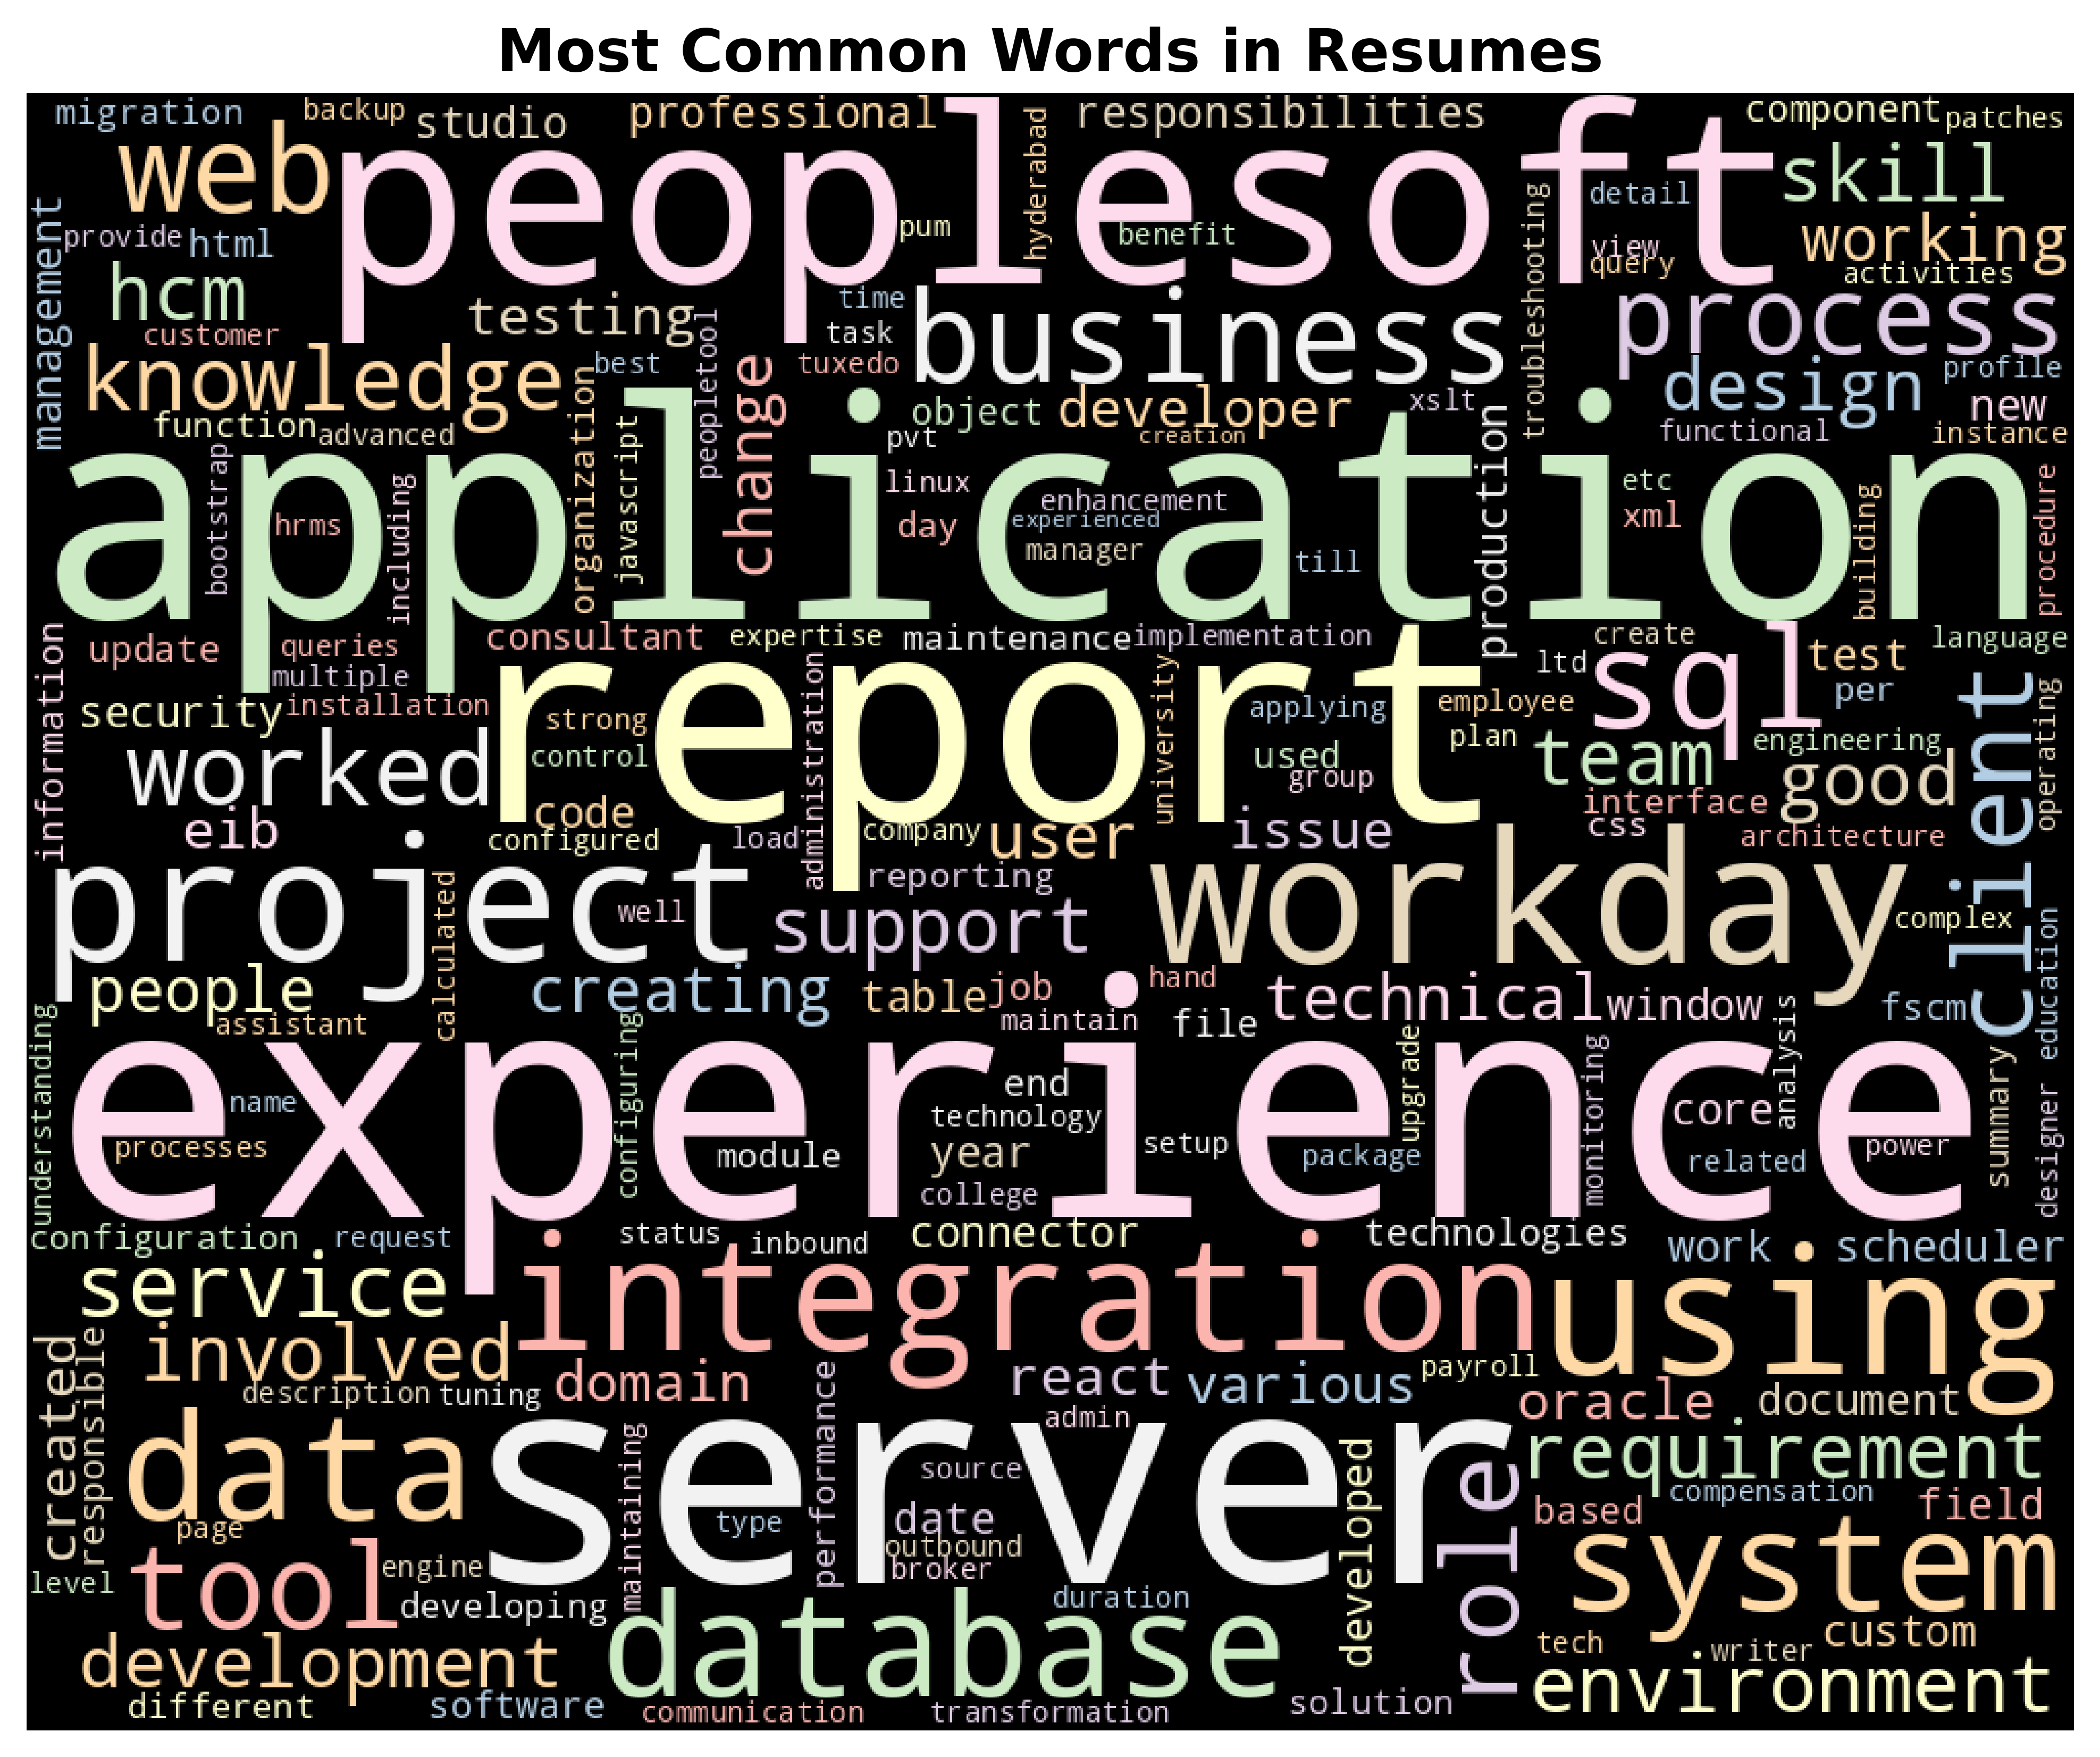

In [51]:
text = " ".join(cat for cat in resume_data.Resume_Details) # Creating the text variable

word_cloud = WordCloud(width=1000, height=800, random_state=10, background_color="black",
                       colormap="Pastel1", collocations=False, stopwords=STOPWORDS).generate(text)

plt.figure(figsize=(10,8), dpi=500) # Display the generated Word Cloud
plt.title('Most Common Words in Resumes', fontsize= 16, fontweight= 'bold')
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

# **MODEL BUILDING **

In [53]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import f1_score, classification_report, precision_score, recall_score


In [54]:
import warnings
warnings.filterwarnings('ignore')

In [56]:
resume_data = pd.read_csv('new_Resumes.csv')
resume_data.head()

,category,Resume_Details
0,PeopleSoft resume,profile summary years experience implementing ...
1,PeopleSoft resume,classification internal classification interna...
2,PeopleSoft resume,priyanka ramadoss mountpleasant coonoor nilgir...
3,PeopleSoft resume,murali professional summary years experience p...
4,PeopleSoft resume,priyabrata hota career objective pursuing peop...


import numpy as np
from google.colab import autoviz
df_5330398974927709631 = autoviz.get_registered_df('df_5330398974927709631')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_5330398974927709631, *['Resume_Details'], **{})
chart

In [58]:
from sklearn.preprocessing import LabelEncoder
Encoder=LabelEncoder()
resume_data["LebelEncoding"]=Encoder.fit_transform(resume_data ["category"])

resume_data

,category,Resume_Details,LebelEncoding
0,PeopleSoft resume,profile summary years experience implementing ...,0
1,PeopleSoft resume,classification internal classification interna...,0
2,PeopleSoft resume,priyanka ramadoss mountpleasant coonoor nilgir...,0
3,PeopleSoft resume,murali professional summary years experience p...,0
4,PeopleSoft resume,priyabrata hota career objective pursuing peop...,0
...,...,...,...
74,React Developer,curriculum vitae anjani priyadarshini objectiv...,1
75,React Developer,ranga gaganam professional summary professiona...,1
76,React Developer,sarala madasu sarala madasu sri geethika prest...,1
77,React Developer,khizaruddin rauf experience currently working ...,1


In [59]:
resume_data.describe()

,LebelEncoding
count,79.000000
mean,1.455696
std,1.141271
min,0.000000
25%,0.500000
50%,1.000000
75%,3.000000
max,3.000000


In [60]:
resume_data.isnull().sum()

category          0
Resume_Details    0
LebelEncoding     0
dtype: int64

In [62]:
x = resume_data['Resume_Details'].values
y = resume_data['category'].values

In [63]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=45, test_size=0.25,stratify=y)
x_train.shape, x_test.shape

((59,), (20,))

In [64]:
tfidf_vector = TfidfVectorizer(sublinear_tf=True,stop_words='english')

In [65]:
x_train = tfidf_vector.fit_transform(x_train)
x_test = tfidf_vector.transform(x_test)

In [66]:
x_train.shape, x_test.shape

((59, 3796), (20, 3796))

In [67]:
print(y_train),print(y_test)

['PeopleSoft resume' 'React Developer' 'PeopleSoft resume'
 'workday resume' 'SQL Developer' 'SQL Developer' 'React Developer'
 'PeopleSoft resume' 'React Developer' 'PeopleSoft resume'
 'React Developer' 'SQL Developer' 'React Developer' 'React Developer'
 'workday resume' 'React Developer' 'SQL Developer' 'React Developer'
 'PeopleSoft resume' 'React Developer' 'React Developer' 'workday resume'
 'PeopleSoft resume' 'PeopleSoft resume' 'PeopleSoft resume'
 'SQL Developer' 'workday resume' 'workday resume' 'workday resume'
 'React Developer' 'workday resume' 'React Developer' 'SQL Developer'
 'workday resume' 'React Developer' 'workday resume' 'SQL Developer'
 'workday resume' 'PeopleSoft resume' 'PeopleSoft resume' 'SQL Developer'
 'PeopleSoft resume' 'workday resume' 'SQL Developer' 'PeopleSoft resume'
 'workday resume' 'PeopleSoft resume' 'SQL Developer' 'workday resume'
 'workday resume' 'workday resume' 'PeopleSoft resume' 'React Developer'
 'React Developer' 'React Developer' 'P

(None, None)

MACHINE LEARINING MODELS

Logistic Regression

In [79]:
model_lgr = LogisticRegression()
model_lgr.fit(x_train, y_train)
y_pred = model_lgr.predict(x_test)
accuracy_lgr = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_lgr.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_lgr.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_lgr,classification_report(y_test, y_pred)))
nb_score = model_lgr.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)


precision_lgr = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_lgr = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_lgr = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_lgr = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 0.95
Classification report for classifier LogisticRegression():
                   precision    recall  f1-score   support

PeopleSoft resume       1.00      1.00      1.00         5
  React Developer       0.86      1.00      0.92         6
    SQL Developer       1.00      0.75      0.86         4
   workday resume       1.00      1.00      1.00         5

         accuracy                           0.95        20
        macro avg       0.96      0.94      0.95        20
     weighted avg       0.96      0.95      0.95        20




KNN Classifier

In [68]:
model_knn = KNeighborsClassifier(n_neighbors=41)
model_knn.fit(x_train, y_train)
y_pred = model_knn.predict(x_test)
accuracy_knn = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_knn.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_knn.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_knn,classification_report(y_test, y_pred)))
nb_score = model_knn.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_knn = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_knn = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_knn = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_knn = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 0.64
Accuracy of  test set    : 0.60
Classification report for classifier KNeighborsClassifier(n_neighbors=41):
                   precision    recall  f1-score   support

PeopleSoft resume       0.50      0.20      0.29         5
  React Developer       1.00      1.00      1.00         6
    SQL Developer       0.00      0.00      0.00         4
   workday resume       0.42      1.00      0.59         5

         accuracy                           0.60        20
        macro avg       0.48      0.55      0.47        20
     weighted avg       0.53      0.60      0.52        20




 Decision Tree Classifier

In [69]:
model_DT = DecisionTreeClassifier(criterion='gini')
model_DT.fit(x_train, y_train)
y_pred = model_DT.predict(x_test)
accuracy_DT = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_DT.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_DT.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_DT,classification_report(y_test, y_pred)))
nb_score = model_DT.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_DT = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_DT= round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_DT = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_DT = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 1.00
Classification report for classifier DecisionTreeClassifier():
                   precision    recall  f1-score   support

PeopleSoft resume       1.00      1.00      1.00         5
  React Developer       1.00      1.00      1.00         6
    SQL Developer       1.00      1.00      1.00         4
   workday resume       1.00      1.00      1.00         5

         accuracy                           1.00        20
        macro avg       1.00      1.00      1.00        20
     weighted avg       1.00      1.00      1.00        20




Support Vectore Machine (SVM) Classifier

In [71]:
model_svm = SVC()
model_svm.fit(x_train, y_train)
y_pred = model_svm.predict(x_test)
accuracy_svm = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_svm.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_svm.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_svm,classification_report(y_test, y_pred)))
nb_score = model_svm.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_svm = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_svm = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_svm = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_svm = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 0.95
Classification report for classifier SVC():
                   precision    recall  f1-score   support

PeopleSoft resume       1.00      1.00      1.00         5
  React Developer       0.86      1.00      0.92         6
    SQL Developer       1.00      0.75      0.86         4
   workday resume       1.00      1.00      1.00         5

         accuracy                           0.95        20
        macro avg       0.96      0.94      0.95        20
     weighted avg       0.96      0.95      0.95        20




Random Forest Classifier

In [72]:
model_RF = RandomForestClassifier(n_estimators=200)
model_RF.fit(x_train, y_train)
y_pred = model_RF.predict(x_test)
accuracy_RF = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_RF.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_RF.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_RF,classification_report(y_test, y_pred)))
nb_score = model_RF.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)


precision_RF = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_RF = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_RF = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_RF = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 0.95
Classification report for classifier RandomForestClassifier(n_estimators=200):
                   precision    recall  f1-score   support

PeopleSoft resume       1.00      1.00      1.00         5
  React Developer       0.86      1.00      0.92         6
    SQL Developer       1.00      0.75      0.86         4
   workday resume       1.00      1.00      1.00         5

         accuracy                           0.95        20
        macro avg       0.96      0.94      0.95        20
     weighted avg       0.96      0.95      0.95        20




Bagging Classifier

In [73]:
model_bagg = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)
model_bagg.fit(x_train, y_train)
y_pred = model_bagg.predict(x_test)
accuracy_bagg = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_bagg.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_bagg.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_bagg,classification_report(y_test, y_pred)))
nb_score = model_bagg.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_bagg = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_bagg = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_bagg = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_bagg = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 0.98
Accuracy of  test set    : 1.00
Classification report for classifier BaggingClassifier(estimator=KNeighborsClassifier(), max_features=0.5,
                  max_samples=0.5):
                   precision    recall  f1-score   support

PeopleSoft resume       1.00      1.00      1.00         5
  React Developer       1.00      1.00      1.00         6
    SQL Developer       1.00      1.00      1.00         4
   workday resume       1.00      1.00      1.00         5

         accuracy                           1.00        20
        macro avg       1.00      1.00      1.00        20
     weighted avg       1.00      1.00      1.00        20




AdaBoost Classifier

In [74]:
model_Adaboost = AdaBoostClassifier(n_estimators=100)
model_Adaboost.fit(x_train, y_train)
y_pred = model_Adaboost.predict(x_test)
accuracy_Adaboost = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_Adaboost.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_Adaboost.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_Adaboost,classification_report(y_test, y_pred)))
nb_score = model_Adaboost.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_Adaboost = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_Adaboost = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_Adaboost = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_Adaboost = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 0.75
Accuracy of  test set    : 0.75
Classification report for classifier AdaBoostClassifier(n_estimators=100):
                   precision    recall  f1-score   support

PeopleSoft resume       0.00      0.00      0.00         5
  React Developer       0.55      1.00      0.71         6
    SQL Developer       1.00      1.00      1.00         4
   workday resume       1.00      1.00      1.00         5

         accuracy                           0.75        20
        macro avg       0.64      0.75      0.68        20
     weighted avg       0.61      0.75      0.66        20




Gradient Boosting Classifier

In [75]:
model_GradientBoost = GradientBoostingClassifier(n_estimators=100,learning_rate=1.0,max_depth=1, random_state=0)
model_GradientBoost.fit(x_train, y_train)
y_pred = model_GradientBoost.predict(x_test)
accuracy_GradientBoost = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_GradientBoost.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_GradientBoost.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_GradientBoost,classification_report(y_test, y_pred)))
nb_score = model_GradientBoost.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_Gradientboost = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_Gradientboost = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_Gradientboost = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_Gradientboost = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 1.00
Classification report for classifier GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0):
                   precision    recall  f1-score   support

PeopleSoft resume       1.00      1.00      1.00         5
  React Developer       1.00      1.00      1.00         6
    SQL Developer       1.00      1.00      1.00         4
   workday resume       1.00      1.00      1.00         5

         accuracy                           1.00        20
        macro avg       1.00      1.00      1.00        20
     weighted avg       1.00      1.00      1.00        20




Naive Bayes Classifier

In [76]:
model_NB =MultinomialNB(alpha=1, fit_prior=False, class_prior=None)
model_NB.fit(x_train, y_train)
y_pred = model_NB.predict(x_test)
accuracy_NB = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_NB.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_NB.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_NB,classification_report(y_test, y_pred)))
nb_score = model_NB.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_NB = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_NB = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_NB = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_NB = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 0.95
Classification report for classifier MultinomialNB(alpha=1, fit_prior=False):
                   precision    recall  f1-score   support

PeopleSoft resume       1.00      1.00      1.00         5
  React Developer       0.86      1.00      0.92         6
    SQL Developer       1.00      0.75      0.86         4
   workday resume       1.00      1.00      1.00         5

         accuracy                           0.95        20
        macro avg       0.96      0.94      0.95        20
     weighted avg       0.96      0.95      0.95        20




# Model Evaluation

In [80]:
Evaluation = {"Models":["KNN Classifier","DecisionTree Classifier","RandomForest Classifier","SVM Classifier",
                        "Logistic Regression","Bagging Classifier","AdaBoost Classifier","Gradient Boosting Classifier","Naive Bayes Classifier"],\
            "Train_Accuracy(%)":[model_knn.score(x_train, y_train),model_DT.score(x_train, y_train),model_RF.score(x_train, y_train),model_svm.score(x_train, y_train),model_lgr.score(x_train, y_train),
                                 model_bagg.score(x_train, y_train),model_Adaboost.score(x_train, y_train),model_GradientBoost.score(x_train, y_train), model_NB.score(x_train, y_train)],
            "Test_Accuracy(%)":[accuracy_knn,accuracy_DT,accuracy_RF,accuracy_svm,accuracy_lgr,accuracy_bagg,accuracy_Adaboost,accuracy_GradientBoost,accuracy_NB],\
            "Precision(%)":[precision_knn,precision_DT,precision_RF,precision_svm,precision_lgr,precision_bagg,precision_Adaboost,precision_Gradientboost,precision_NB],\
            "Recall(%)":[recall_knn,recall_DT,recall_RF,recall_svm,recall_lgr,recall_bagg,recall_Adaboost,recall_Gradientboost,recall_NB],\
            "F1-Score(%)":[f1_knn,f1_DT,f1_RF,f1_svm,f1_lgr,f1_bagg,f1_Adaboost,f1_Gradientboost,f1_NB]}
table = pd.DataFrame(Evaluation)
table

,Models,Train_Accuracy(%),Test_Accuracy(%),Precision(%),Recall(%),F1-Score(%)
0,KNN Classifier,0.644068,0.60,0.48,0.55,0.47
1,DecisionTree Classifier,1.000000,1.00,1.00,1.00,1.00
2,RandomForest Classifier,1.000000,0.95,0.96,0.94,0.95
3,SVM Classifier,1.000000,0.95,0.96,0.94,0.95
4,Logistic Regression,1.000000,0.95,0.96,0.94,0.95
5,Bagging Classifier,0.983051,1.00,1.00,1.00,1.00
6,AdaBoost Classifier,0.745763,0.75,0.64,0.75,0.68
7,Gradient Boosting Classifier,1.000000,1.00,1.00,1.00,1.00
8,Naive Bayes Classifier,1.000000,0.95,0.96,0.94,0.95


In [82]:
model_names = ["KNN","DecisionTree","RandomForest ","SVM ", "Logistic Regression",
               "Bagging","AdaBoost","Gradient Boosting ","Naive Bayes"]
Test_accuracies = [accuracy_knn*100,accuracy_DT*100,accuracy_RF*100,
              accuracy_svm*100,accuracy_lgr*100,accuracy_bagg*100,
              accuracy_Adaboost*100,accuracy_GradientBoost*100,accuracy_NB*100]
Train_accuracies=[model_knn.score(x_train, y_train)*100,model_DT.score(x_train, y_train)*100,
                  model_RF.score(x_train, y_train)*100,model_svm.score(x_train, y_train)*100,
                  model_lgr.score(x_train, y_train)*100,model_bagg.score(x_train, y_train)*100,
                  model_Adaboost.score(x_train, y_train)*100,model_GradientBoost.score(x_train, y_train)*100,
                  model_NB.score(x_train, y_train)*100]

 Train and Test Accuracy Plot

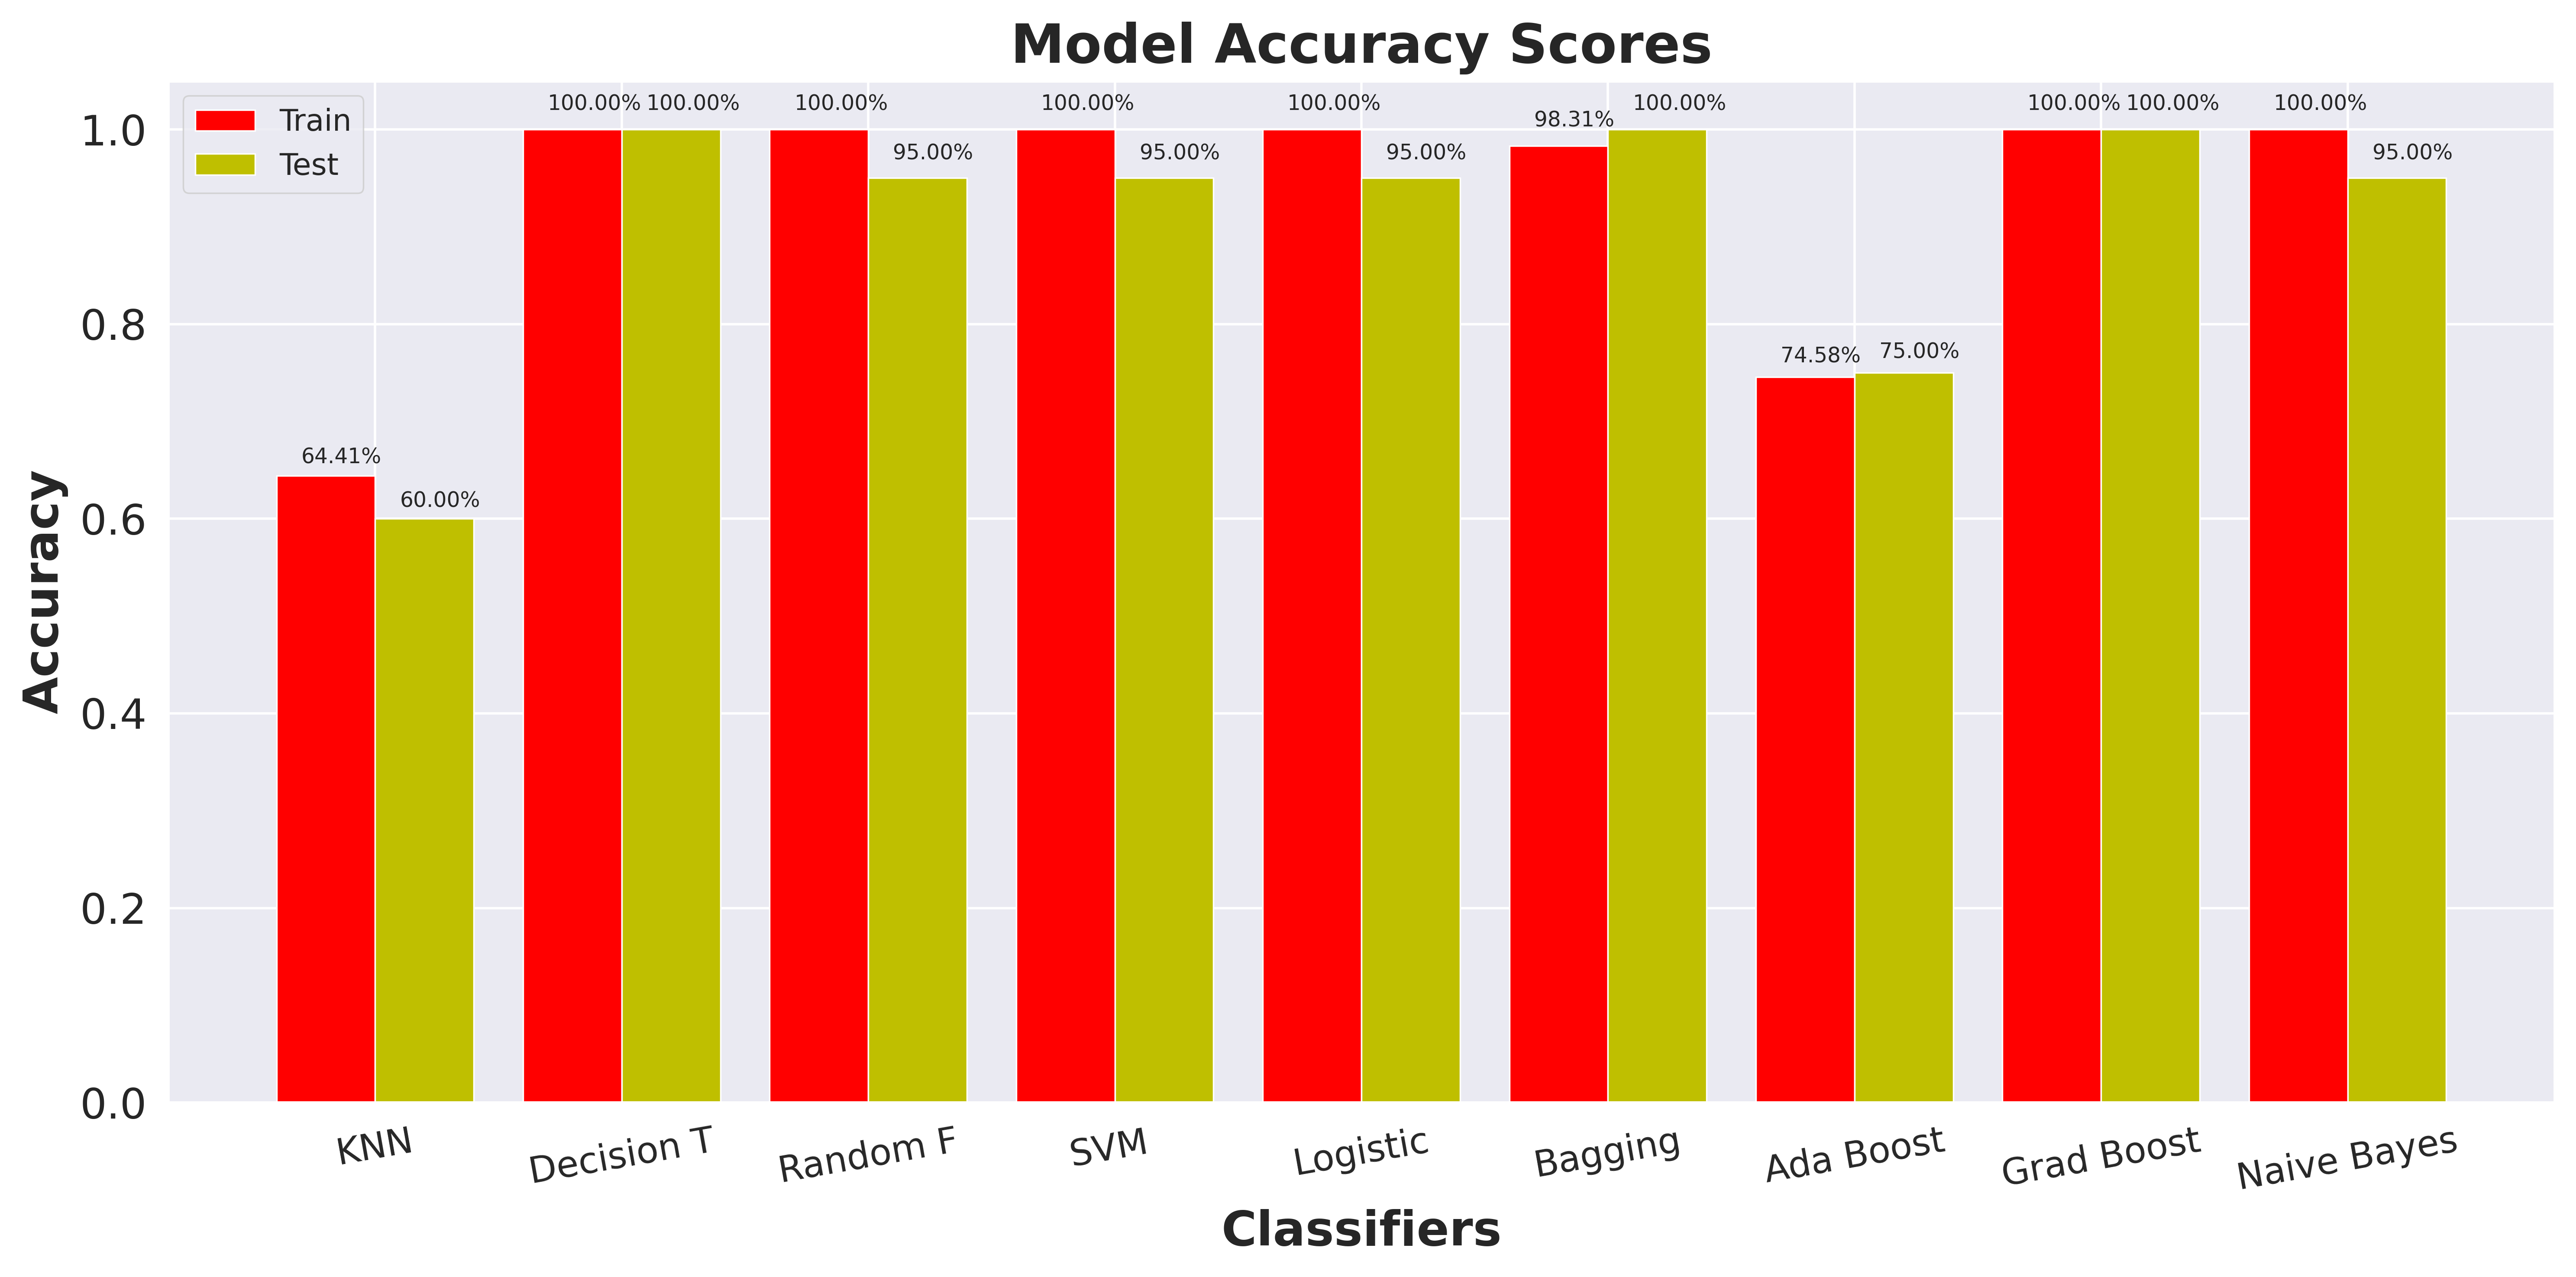

In [84]:
import matplotlib.pyplot as plt
import numpy as np

rcParams = {'xtick.labelsize':'12','ytick.labelsize':'14','axes.labelsize':'16'}
fig, axe = plt.subplots(1,1, figsize=(12,6), dpi=500)
x_pos = np.arange(len(table))
model_names = ["KNN", "Decision T", "Random F", "SVM ", "Logistic", "Bagging", "Ada Boost", "Grad Boost","Naive Bayes"]

bar1 = plt.bar(x_pos - 0.2, table['Train_Accuracy(%)'], width=0.4, label='Train', color= "red")
bar2 = plt.bar(x_pos + 0.2, table['Test_Accuracy(%)'], width=0.4, label='Test', color= "y")
plt.xticks(x_pos, model_names)

plt.xlabel("Classifiers", fontsize = 16, fontweight = 'bold')
plt.ylabel("Accuracy", fontsize = 16, fontweight = 'bold')
plt.title("Model Accuracy Scores", fontsize = 18, fontweight = 'bold')
plt.xticks(rotation = 10)
plt.legend()

for i, bar in enumerate(bar1):
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, bar.get_height()*1.02,
             s = '{:.2f}%'.format(Train_accuracies[i]), fontsize = 7)

for i, bar in enumerate(bar2):
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, bar.get_height()*1.02,
             s = '{:.2f}%'.format(Test_accuracies[i]), fontsize = 7)

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()
fig.savefig('IMG\Mod_Acc_Bar', dpi = 500)